# Import data

In [5]:
import pandas as pd
import numpy as np
from helper import *

current_month = pd.Timestamp.now().month - 1
current_year = pd.Timestamp.now().year

cpu_data = get_cpu_table(current_month, current_year)
gpu_data = get_gpu_table(current_month, current_year)

full_relation = get_full_relation(current_month, current_year)

Connection to PostgreSQL DB successful
Connection to PostgreSQL DB successful
Connection to PostgreSQL DB successful


Preview the data

In [7]:
print(f"CPU Data: {cpu_data.shape[0]} rows, {cpu_data.shape[1]} columns")
print(f"GPU Data: {gpu_data.shape[0]} rows, {gpu_data.shape[1]} columns")
print(f"Full Relation Data: {full_relation.shape[0]} rows, {full_relation.shape[1]} columns")

CPU Data: 2346 rows, 28 columns
GPU Data: 618 rows, 13 columns
Full Relation Data: 2702 rows, 70 columns


# Data Analasys

## CPU tables

### Preview the data

#### Dataframe head

In [10]:
# Display the first few rows
print(cpu_data.head())

                     name performance_clockspeed performance_turbospeed  \
0      amd ryzen 9 7940hx                   2.40                   5.20   
1      amd ryzen 9 7945hx                   2.50                   5.40   
2    apple m3 max 14 core                   4.00                   None   
3  via eden (duplicate 1)                   1.20                   None   
4    omap4 espresso board                   1.00                   None   

   performance_cores  performance_threads efficient_clockspeed  \
0               16.0                 32.0                 None   
1               16.0                 32.0                 None   
2               10.0                 10.0                 None   
3                1.0                  1.0                 None   
4                2.0                  2.0                 None   

  efficient_turbospeed  efficient_cores  efficient_threads    tdp  ...  \
0                 None              NaN                NaN  55.00  ...   
1   

#### Dataframe tail

In [11]:
# Display the first few rows
print(cpu_data.tail())

                       name performance_clockspeed performance_turbospeed  \
2341  intel core i9 13900hx                   2.20                   5.40   
2342  intel core i9 14900hx                   2.20                   5.80   
2343     amd ryzen 9 7845hx                   3.00                   5.20   
2344  intel core i9 13980hx                   2.20                   5.60   
2345   amd ryzen 9 7945hx3d                   2.30                   5.40   

      performance_cores  performance_threads efficient_clockspeed  \
2341                8.0                 16.0                 1.60   
2342                8.0                 16.0                 1.60   
2343               12.0                 24.0                 None   
2344                8.0                 16.0                 None   
2345               16.0                 32.0                 None   

     efficient_turbospeed  efficient_cores  efficient_threads    tdp  ...  \
2341                 3.90             16.0   

#### Check the data types and non-null counts

In [12]:
print(cpu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2346 non-null   object 
 1   performance_clockspeed    2336 non-null   object 
 2   performance_turbospeed    925 non-null    object 
 3   performance_cores         2257 non-null   float64
 4   performance_threads       2257 non-null   float64
 5   efficient_clockspeed      128 non-null    object 
 6   efficient_turbospeed      114 non-null    object 
 7   efficient_cores           162 non-null    float64
 8   efficient_threads         162 non-null    float64
 9   tdp                       1440 non-null   object 
 10  multithread_rating        2346 non-null   int64  
 11  single_thread_rating      2346 non-null   int64  
 12  l1_instruction_cache      1408 non-null   object 
 13  l1_data_cache             1406 non-null   object 
 14  l2_cache

#### Look at descriptive statistics

In [13]:
print(cpu_data.describe())

       performance_cores  performance_threads  efficient_cores  \
count        2257.000000          2257.000000       162.000000   
mean            4.546743             5.949047         6.808642   
std             2.802396             4.000950         2.879644   
min             1.000000             1.000000         2.000000   
25%             2.000000             4.000000         4.000000   
50%             4.000000             4.000000         8.000000   
75%             8.000000             8.000000         8.000000   
max            32.000000            32.000000        16.000000   

       efficient_threads  multithread_rating  single_thread_rating  \
count         162.000000         2346.000000           2346.000000   
mean            6.975309         5052.590793           1393.645354   
std             3.082611         7324.056972           1014.524862   
min             2.000000           93.000000             95.000000   
25%             4.000000          842.250000           

### Feature Analysis

#### Overall Performance Ratings

Features:
- `multithread_rating`, `single_thread_rating`

##### Distribution of ratings

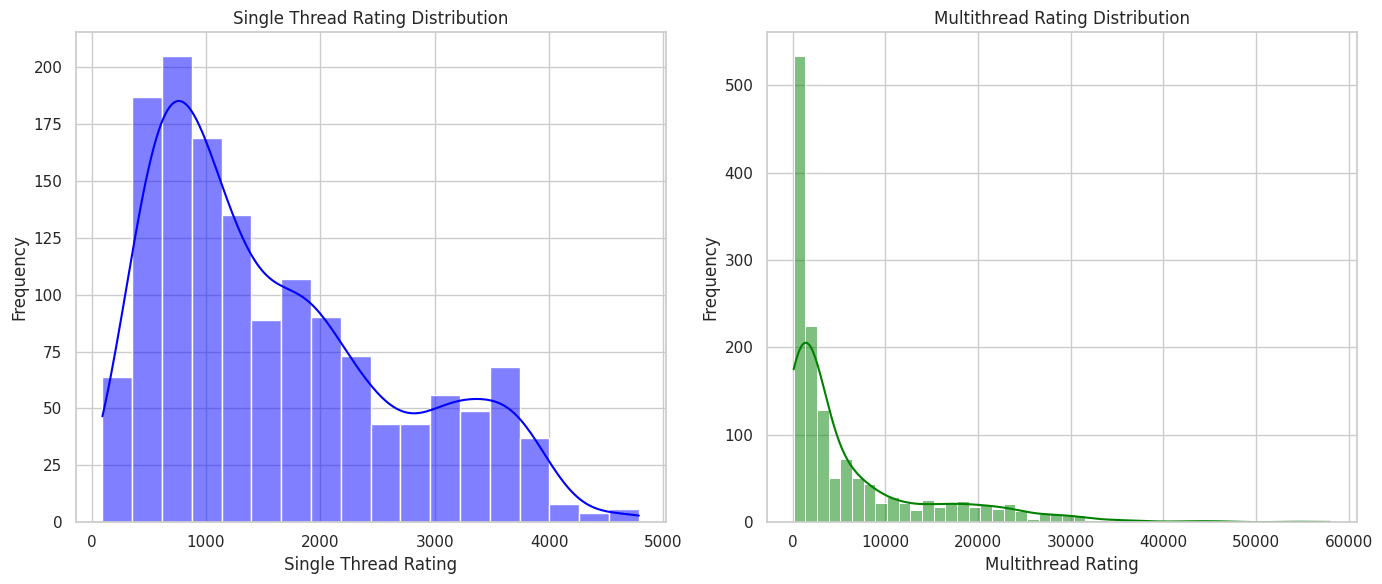

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot single_thread_rating distribution
sns.histplot(cpu_data['single_thread_rating'], ax=axes[0], color='blue', kde=True)
axes[0].set_title("Single Thread Rating Distribution")
axes[0].set_xlabel('Single Thread Rating')
axes[0].set_ylabel('Frequency')

# Plot multithread_rating distribution
sns.histplot(cpu_data['multithread_rating'], ax=axes[1], color='green', kde=True)
axes[1].set_title("Multithread Rating Distribution")
axes[1].set_xlabel('Multithread Rating')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [59]:
# Generate statistics for single_thread_rating
single_thread_stats = cpu_data['single_thread_rating'].describe()
print("Single Thread Rating Statistics:")
print(single_thread_stats)

# Generate statistics for multithread_rating
multithread_stats = cpu_data['multithread_rating'].describe()
print("\nMultithread Rating Statistics:")
print(multithread_stats)

Single Thread Rating Statistics:
count    1433.000000
mean     1618.173064
std      1061.822940
min        95.000000
25%       755.000000
50%      1314.000000
75%      2282.000000
max      4785.000000
Name: single_thread_rating, dtype: float64

Multithread Rating Statistics:
count     1433.000000
mean      6319.190509
std       8550.097482
min         93.000000
25%        849.000000
50%       2349.000000
75%       8046.000000
max      58008.000000
Name: multithread_rating, dtype: float64


##### Single vs Multithreaded

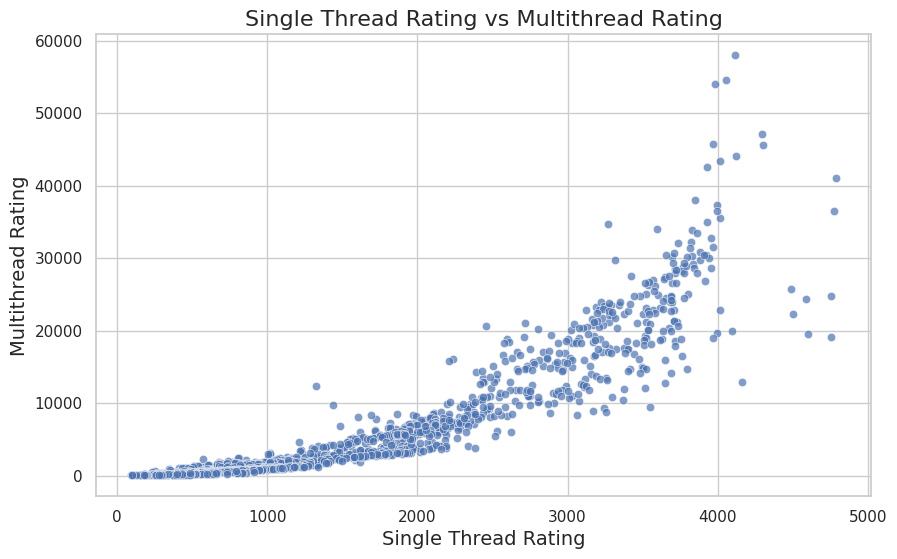

The correlation between single_thread_rating and multithread_rating is: 0.90


In [55]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu_data, x='single_thread_rating', y='multithread_rating', alpha=0.7)

# Add titles and labels
plt.title("Single Thread Rating vs Multithread Rating", fontsize=16)
plt.xlabel("Single Thread Rating", fontsize=14)
plt.ylabel("Multithread Rating", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = cpu_data['single_thread_rating'].corr(cpu_data['multithread_rating'])
print(f"The correlation between single_thread_rating and multithread_rating is: {correlation:.2f}")

#### Clockspeed metrics

Features:
- `performance_clockspeed`, `performance_turbospeed`
- `efficient_clockspeed`, `efficient_turbospeed`

##### Distribution

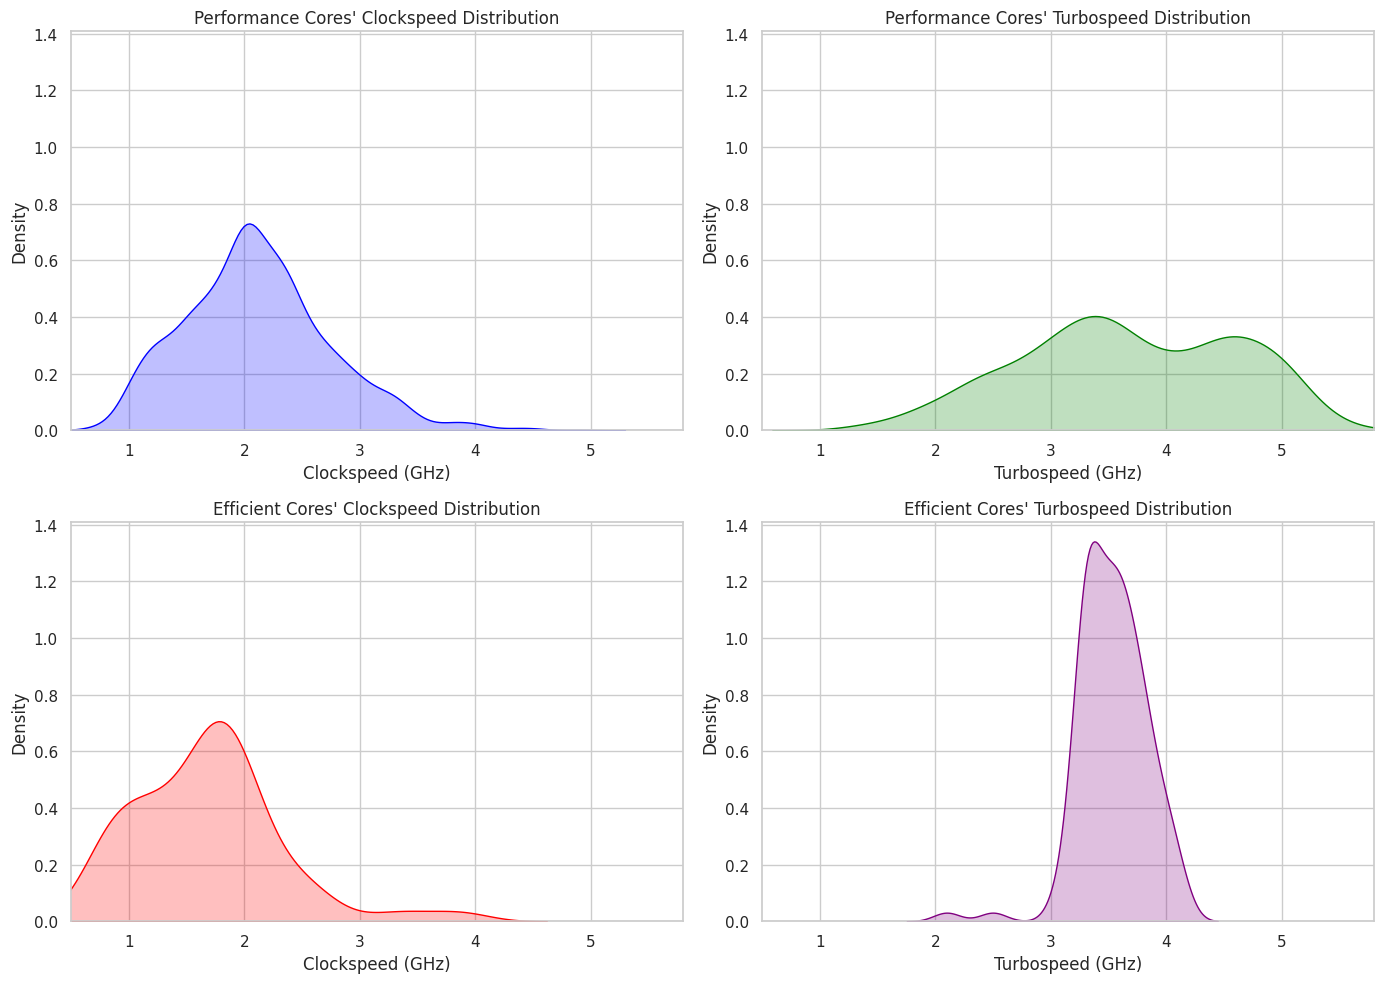

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance clockspeed
sns.kdeplot(cpu_data['performance_clockspeed'].dropna(), ax=axes[0, 0], color='blue', fill=True)
axes[0, 0].set_title("Performance Cores' Clockspeed Distribution")
axes[0, 0].set_xlabel('Clockspeed (GHz)')
axes[0, 0].set_ylabel('Density')

# Plot performance turbospeed
sns.kdeplot(cpu_data['performance_turbospeed'].dropna(), ax=axes[0, 1], color='green', fill=True)
axes[0, 1].set_title("Performance Cores' Turbospeed Distribution")
axes[0, 1].set_xlabel('Turbospeed (GHz)')
axes[0, 1].set_ylabel('Density')

# Plot efficient clockspeed
sns.kdeplot(cpu_data['efficient_clockspeed'].dropna(), ax=axes[1, 0], color='red', fill=True)
axes[1, 0].set_title("Efficient Cores' Clockspeed Distribution")
axes[1, 0].set_xlabel('Clockspeed (GHz)')
axes[1, 0].set_ylabel('Density')

# Plot efficient turbospeed
sns.kdeplot(cpu_data['efficient_turbospeed'].dropna(), ax=axes[1, 1], color='purple', fill=True)
axes[1, 1].set_title("Efficient Cores' Turbospeed Distribution")
axes[1, 1].set_xlabel('Turbospeed (GHz)')
axes[1, 1].set_ylabel('Density')

# Determine common x and y limits for all plots
x_min = min(
    cpu_data['performance_clockspeed'].min(),
    cpu_data['performance_turbospeed'].min(),
    cpu_data['efficient_clockspeed'].min(),
    cpu_data['efficient_turbospeed'].min(),
)

x_max = max(
    cpu_data['performance_clockspeed'].max(),
    cpu_data['performance_turbospeed'].max(),
    cpu_data['efficient_clockspeed'].max(),
    cpu_data['efficient_turbospeed'].max(),
)

y_max = max(ax.get_ylim()[1] for ax in axes.flat)  # Find the maximum y limit among all plots

# Set common limits
for ax in axes.flat:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


##### Correlation with Performance

In [24]:
# Calculate correlations
correlation_performance_single = cpu_data['performance_clockspeed'].corr(cpu_data['single_thread_rating'])
correlation_performance_multi = cpu_data['performance_clockspeed'].corr(cpu_data['multithread_rating'])
correlation_efficient_single = cpu_data['efficient_clockspeed'].corr(cpu_data['single_thread_rating'])
correlation_efficient_multi = cpu_data['efficient_clockspeed'].corr(cpu_data['multithread_rating'])

# Print the results
print(f"Correlation between performance_clockspeed and single_thread_rating: {correlation_performance_single:.2f}")
print(f"Correlation between performance_clockspeed and multithread_rating: {correlation_performance_multi:.2f}")
print(f"Correlation between efficient_clockspeed and single_thread_rating: {correlation_efficient_single:.2f}")
print(f"Correlation between efficient_clockspeed and multithread_rating: {correlation_efficient_multi:.2f}")

Correlation between performance_clockspeed and single_thread_rating: 0.60
Correlation between performance_clockspeed and multithread_rating: 0.48
Correlation between efficient_clockspeed and single_thread_rating: 0.20
Correlation between efficient_clockspeed and multithread_rating: 0.14


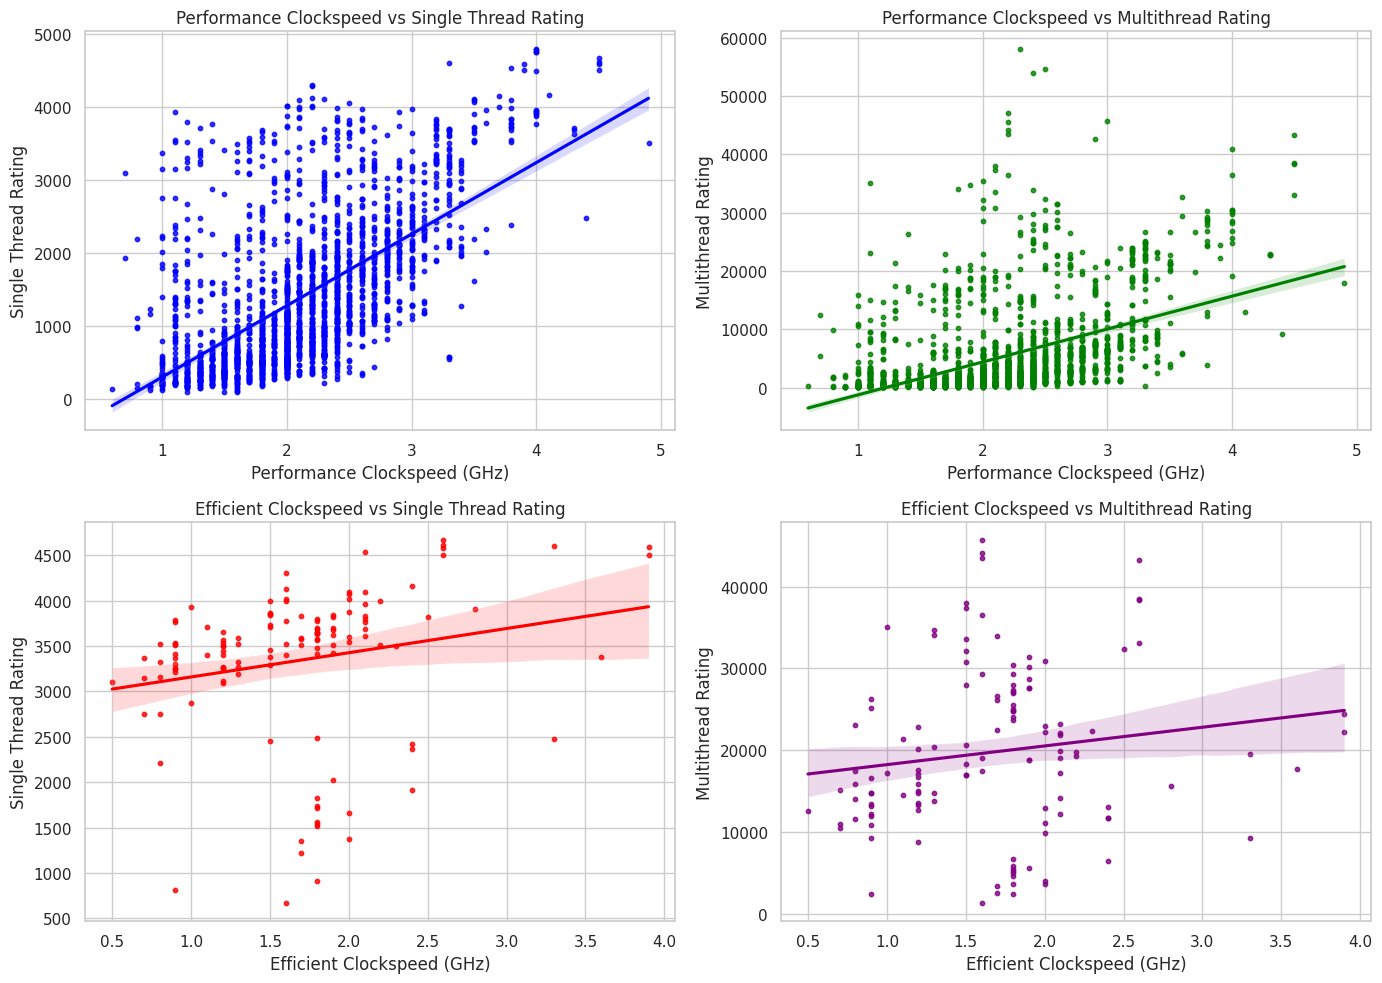

In [26]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance_clockspeed vs single_thread_rating with regression line
sns.regplot(data=cpu_data, x='performance_clockspeed', y='single_thread_rating', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title('Performance Clockspeed vs Single Thread Rating')
axes[0, 0].set_xlabel('Performance Clockspeed (GHz)')
axes[0, 0].set_ylabel('Single Thread Rating')

# Plot performance_clockspeed vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='performance_clockspeed', y='multithread_rating', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title('Performance Clockspeed vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Clockspeed (GHz)')
axes[0, 1].set_ylabel('Multithread Rating')

# Plot efficient_clockspeed vs single_thread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_clockspeed', y='single_thread_rating', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title('Efficient Clockspeed vs Single Thread Rating')
axes[1, 0].set_xlabel('Efficient Clockspeed (GHz)')
axes[1, 0].set_ylabel('Single Thread Rating')

# Plot efficient_clockspeed vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_clockspeed', y='multithread_rating', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title('Efficient Clockspeed vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Clockspeed (GHz)')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

##### Boost impact

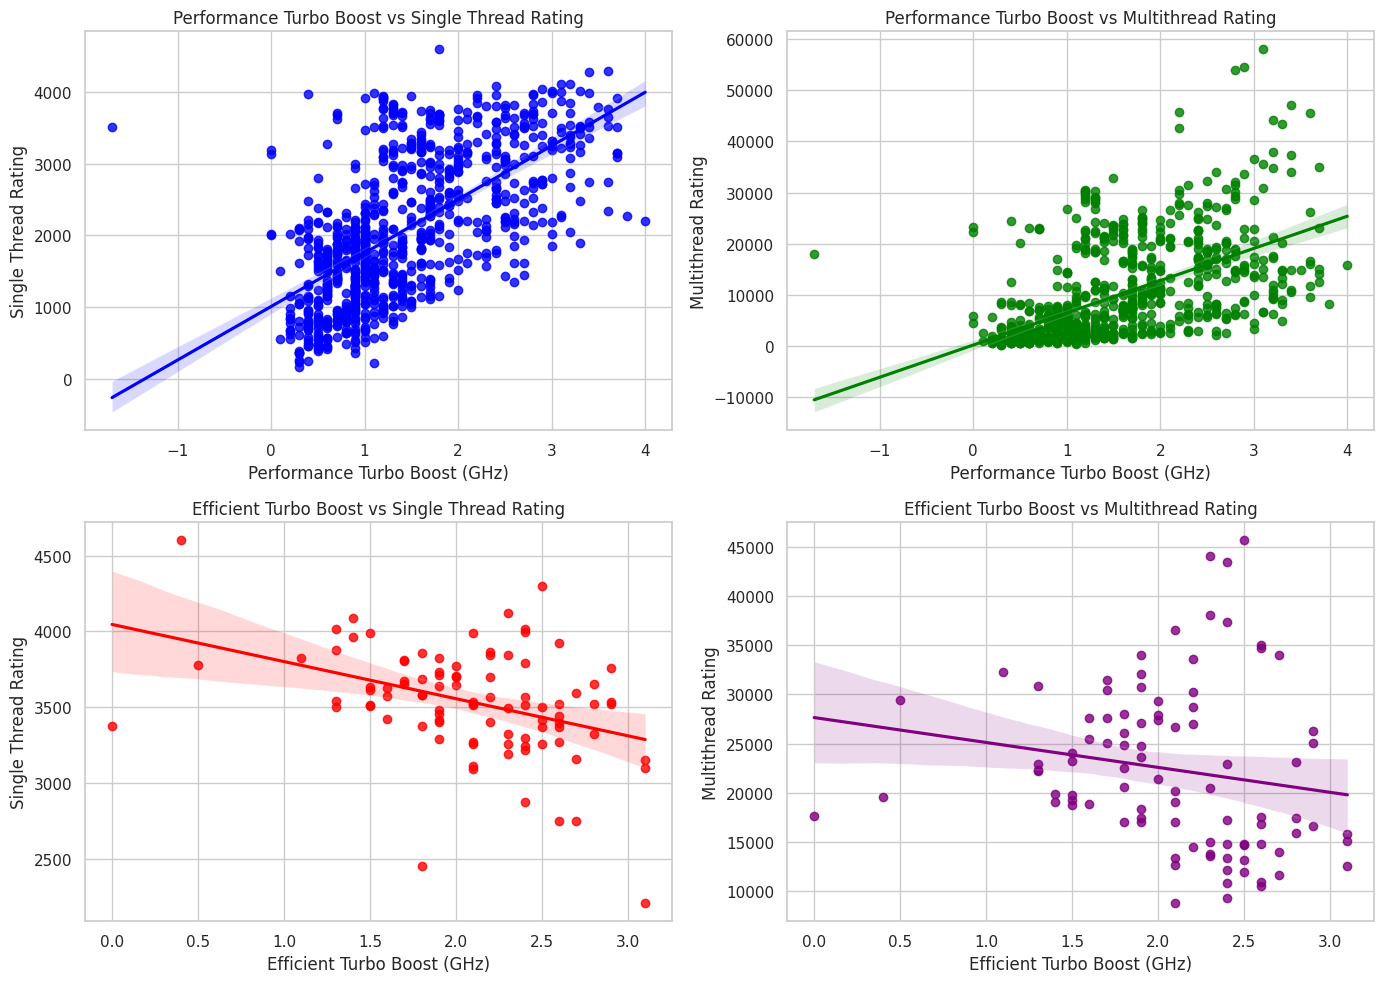

In [27]:
# Convert columns to numeric, forcing errors to NaN
cpu_data['performance_turbospeed'] = pd.to_numeric(cpu_data['performance_turbospeed'], errors='coerce')
cpu_data['performance_clockspeed'] = pd.to_numeric(cpu_data['performance_clockspeed'], errors='coerce')
cpu_data['efficient_turbospeed'] = pd.to_numeric(cpu_data['efficient_turbospeed'], errors='coerce')
cpu_data['efficient_clockspeed'] = pd.to_numeric(cpu_data['efficient_clockspeed'], errors='coerce')

# Compute turbo boost margins
cpu_data['performance_turbo_boost'] = cpu_data['performance_turbospeed'] - cpu_data['performance_clockspeed']
cpu_data['efficient_turbo_boost'] = cpu_data['efficient_turbospeed'] - cpu_data['efficient_clockspeed']

# Analyze turbo boost impact on single_thread_rating and multithread_rating
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Performance turbo boost vs single_thread_rating
sns.regplot(data=cpu_data, x='performance_turbo_boost', y='single_thread_rating', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Performance Turbo Boost vs Single Thread Rating')
axes[0, 0].set_xlabel('Performance Turbo Boost (GHz)')
axes[0, 0].set_ylabel('Single Thread Rating')

# Performance turbo boost vs multithread_rating
sns.regplot(data=cpu_data, x='performance_turbo_boost', y='multithread_rating', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Performance Turbo Boost vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Turbo Boost (GHz)')
axes[0, 1].set_ylabel('Multithread Rating')

# Efficient turbo boost vs single_thread_rating
sns.regplot(data=cpu_data, x='efficient_turbo_boost', y='single_thread_rating', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Efficient Turbo Boost vs Single Thread Rating')
axes[1, 0].set_xlabel('Efficient Turbo Boost (GHz)')
axes[1, 0].set_ylabel('Single Thread Rating')

# Efficient turbo boost vs multithread_rating
sns.regplot(data=cpu_data, x='efficient_turbo_boost', y='multithread_rating', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Efficient Turbo Boost vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Turbo Boost (GHz)')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

#### Core & Thread Analysis

Features:
- `performance_cores`, `performance_threads`
- `efficient_cores`, `efficient_threads`

##### Distribution

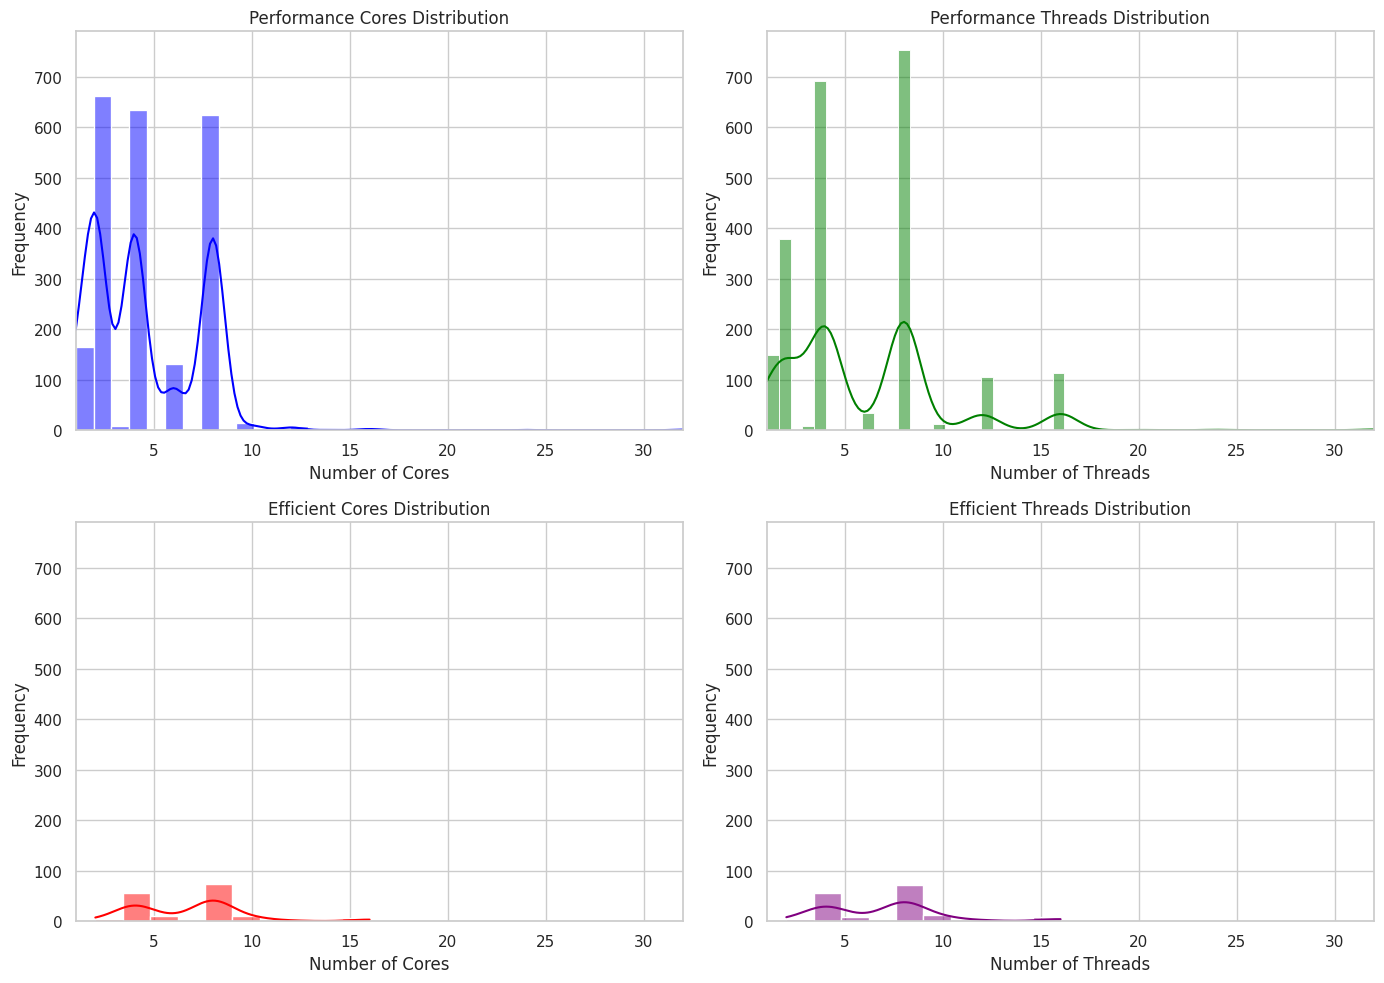

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance cores
sns.histplot(cpu_data['performance_cores'].dropna(), ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title("Performance Cores Distribution")
axes[0, 0].set_xlabel('Number of Cores')
axes[0, 0].set_ylabel('Frequency')

# Plot performance threads
sns.histplot(cpu_data['performance_threads'].dropna(), ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title("Performance Threads Distribution")
axes[0, 1].set_xlabel('Number of Threads')
axes[0, 1].set_ylabel('Frequency')

# Plot efficient cores
sns.histplot(cpu_data['efficient_cores'].dropna(), ax=axes[1, 0], color='red', kde=True)
axes[1, 0].set_title("Efficient Cores Distribution")
axes[1, 0].set_xlabel('Number of Cores')
axes[1, 0].set_ylabel('Frequency')

# Plot efficient threads
sns.histplot(cpu_data['efficient_threads'].dropna(), ax=axes[1, 1], color='purple', kde=True)
axes[1, 1].set_title("Efficient Threads Distribution")
axes[1, 1].set_xlabel('Number of Threads')
axes[1, 1].set_ylabel('Frequency')

# Determine common x and y limits for all plots
x_min = min(
    cpu_data['performance_cores'].min(),
    cpu_data['performance_threads'].min(),
    cpu_data['efficient_cores'].min(),
    cpu_data['efficient_threads'].min(),
)

x_max = max(
    cpu_data['performance_cores'].max(),
    cpu_data['performance_threads'].max(),
    cpu_data['efficient_cores'].max(),
    cpu_data['efficient_threads'].max(),
)

y_max = max(ax.get_ylim()[1] for ax in axes.flat)  # Get the maximum y-limit among all plots

# Set common x and y limits for all subplots
for ax in axes.flat:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [42]:
# Calculate core/thread ratio for performance and efficient cores
cpu_data['performance_core_thread_ratio'] = cpu_data['performance_cores'] / cpu_data['performance_threads']
cpu_data['efficient_core_thread_ratio'] = cpu_data['efficient_cores'] / cpu_data['efficient_threads']

# Calculate frequency counts for each ratio
performance_ratio_counts = cpu_data['performance_core_thread_ratio'].value_counts().sort_index()
efficient_ratio_counts = cpu_data['efficient_core_thread_ratio'].value_counts().sort_index()

# Print the frequency of core/thread ratios
print("Performance Core/Thread Ratio Frequencies:")
print(performance_ratio_counts)

print("\nEfficient Core/Thread Ratio Frequencies:")
print(efficient_ratio_counts)


Performance Core/Thread Ratio Frequencies:
performance_core_thread_ratio
0.5     773
1.0    1484
Name: count, dtype: int64

Efficient Core/Thread Ratio Frequencies:
efficient_core_thread_ratio
0.5      4
1.0    158
Name: count, dtype: int64


##### Multi-threading impact

In [33]:
# Calculate correlations
correlation_performance_cores = cpu_data['performance_cores'].corr(cpu_data['multithread_rating'])
correlation_performance_threads = cpu_data['performance_threads'].corr(cpu_data['multithread_rating'])
correlation_efficient_cores = cpu_data['efficient_cores'].corr(cpu_data['multithread_rating'])
correlation_efficient_threads = cpu_data['efficient_threads'].corr(cpu_data['multithread_rating'])

# Print the results
print(f"Correlation between performance_cores and multithread_rating: {correlation_performance_cores:.2f}")
print(f"Correlation between performance_threads and multithread_rating: {correlation_performance_threads:.2f}")
print(f"Correlation between efficient_cores and multithread_rating: {correlation_efficient_cores:.2f}")
print(f"Correlation between efficient_threads and multithread_rating: {correlation_efficient_threads:.2f}")

Correlation between performance_cores and multithread_rating: 0.41
Correlation between performance_threads and multithread_rating: 0.74
Correlation between efficient_cores and multithread_rating: 0.47
Correlation between efficient_threads and multithread_rating: 0.50


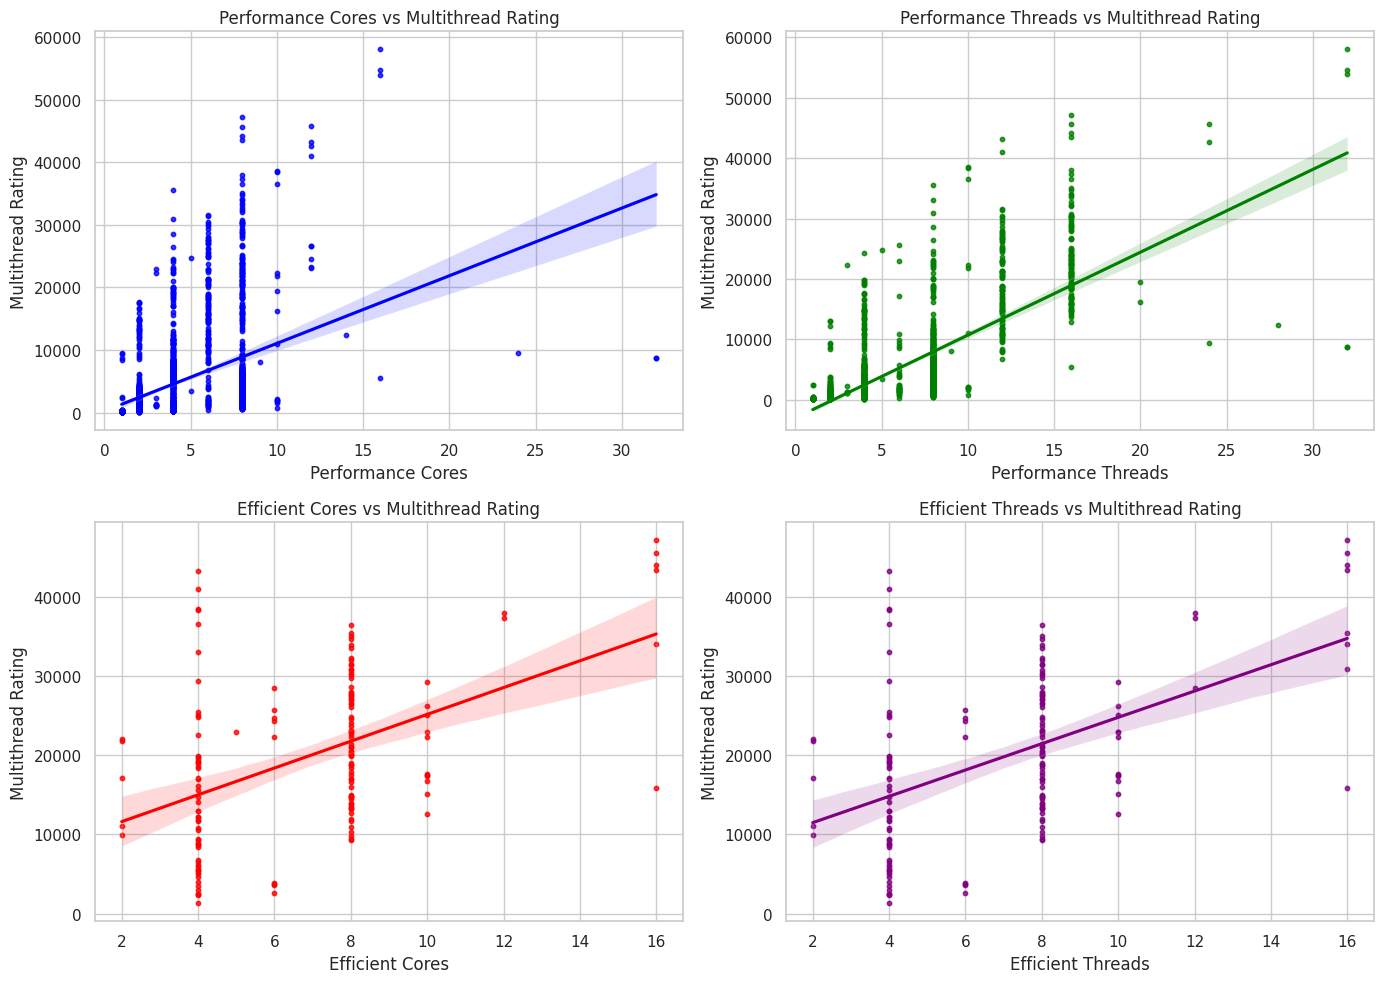

In [32]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance_cores vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='performance_cores', y='multithread_rating', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title('Performance Cores vs Multithread Rating')
axes[0, 0].set_xlabel('Performance Cores')
axes[0, 0].set_ylabel('Multithread Rating')

# Plot performance_threads vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='performance_threads', y='multithread_rating', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title('Performance Threads vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Threads')
axes[0, 1].set_ylabel('Multithread Rating')

# Plot efficient_cores vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_cores', y='multithread_rating', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title('Efficient Cores vs Multithread Rating')
axes[1, 0].set_xlabel('Efficient Cores')
axes[1, 0].set_ylabel('Multithread Rating')

# Plot efficient_threads vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_threads', y='multithread_rating', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title('Efficient Threads vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Threads')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

#### Power Consumption (TDP)

Features:
- `TDP`

##### TDP vs Performance

In [44]:
# Ensure 'tdp' column is numeric
cpu_data['tdp'] = pd.to_numeric(cpu_data['tdp'], errors='coerce')

# Calculate correlations
correlation_tdp_single = cpu_data['tdp'].corr(cpu_data['single_thread_rating'])
correlation_tdp_multi = cpu_data['tdp'].corr(cpu_data['multithread_rating'])

# Print the results
print(f"Correlation between TDP and single_thread_rating: {correlation_tdp_single:.2f}")
print(f"Correlation between TDP and multithread_rating: {correlation_tdp_multi:.2f}")

Correlation between TDP and single_thread_rating: 0.39
Correlation between TDP and multithread_rating: 0.43


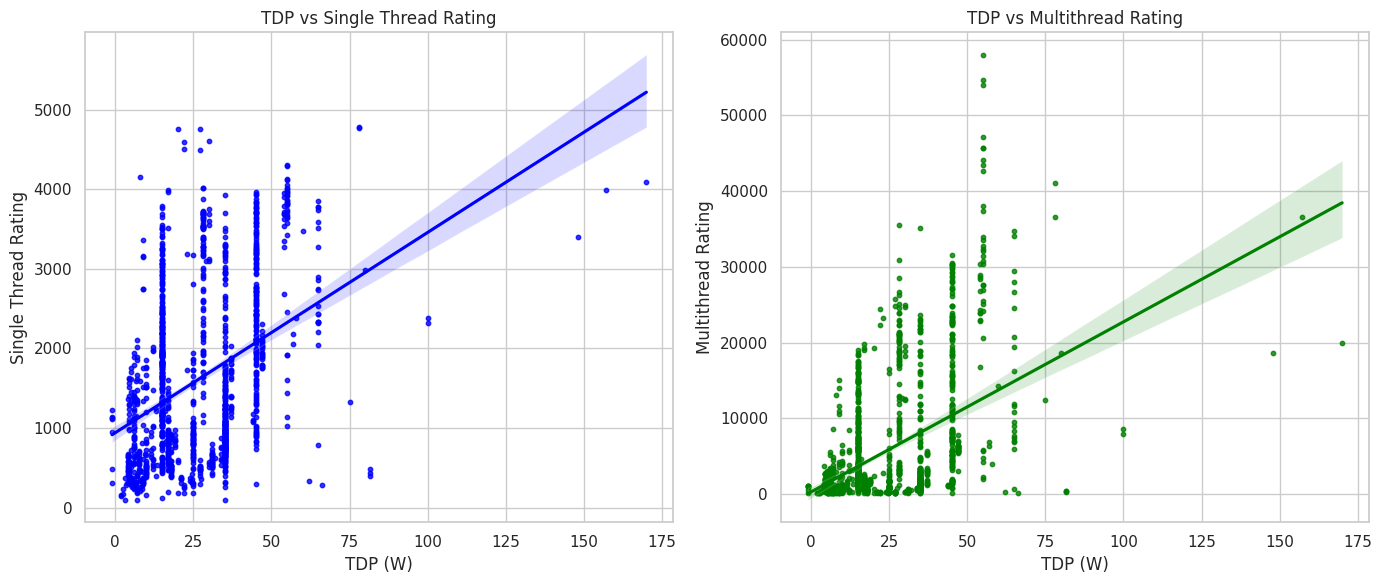

In [46]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot TDP vs single_thread_rating with regression line
sns.regplot(data=cpu_data, x='tdp', y='single_thread_rating', ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('TDP vs Single Thread Rating')
axes[0].set_xlabel('TDP (W)')
axes[0].set_ylabel('Single Thread Rating')

# Plot TDP vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='tdp', y='multithread_rating', ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('TDP vs Multithread Rating')
axes[1].set_xlabel('TDP (W)')
axes[1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

##### Efficiency Analysis

Top 5 rows:
                         name  multithread_rating   tdp  \
2113  intel core ultra 7 164u               15106   9.0   
2081            apple a18 pro               13020   8.0   
2090      intel core i7 1260u               14001   9.0   
2052      intel core i7 1250u               11654   9.0   
2331    amd ryzen ai 9 hx 370               35501  28.0   

      performance_efficiency  
2113             1678.444444  
2081             1627.500000  
2090             1555.666667  
2052             1294.888889  
2331             1267.892857  

Bottom 5 rows:
                             name  multithread_rating   tdp  \
70   mobile amd athlon xp-m 1800+                 193  45.0   
187    mobile amd athlon 64 3400+                 333  81.5   
181    mobile amd athlon 64 3200+                 326  81.5   
6              intel celeron b710                 106  35.0   
16   mobile intel celeron 1.80ghz                 121  66.1   

     performance_efficiency  
70                 4.2

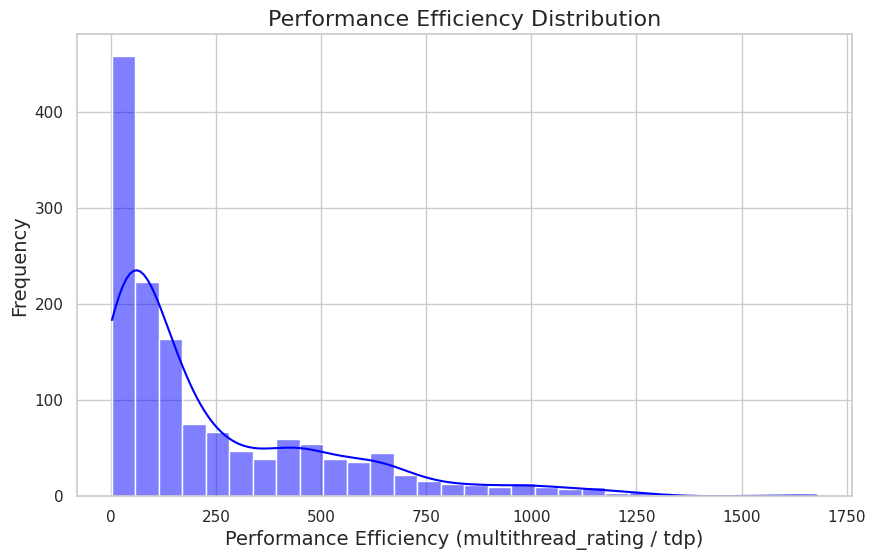

In [52]:
# Ensure 'tdp' column is numeric
cpu_data['tdp'] = pd.to_numeric(cpu_data['tdp'], errors='coerce')

# Calculate performance efficiency
cpu_data['performance_efficiency'] = cpu_data['multithread_rating'] / cpu_data['tdp']

# Drop rows with NaN values in 'performance_efficiency'
cpu_data = cpu_data.dropna(subset=['performance_efficiency'])

# Filter out rows where 'performance_efficiency' is less than or equal to 0
cpu_data = cpu_data[cpu_data['performance_efficiency'] > 0]

# Sort the DataFrame by 'performance_efficiency'
cpu_data = cpu_data.sort_values(by='performance_efficiency', ascending=False)

# Display the top 5 rows of the updated DataFrame
print("Top 5 rows:")
print(cpu_data[['name', 'multithread_rating', 'tdp', 'performance_efficiency']].head())

# Display the bottom 5 rows of the updated DataFrame
print("\nBottom 5 rows:")
print(cpu_data[['name', 'multithread_rating', 'tdp', 'performance_efficiency']].tail())

# Plot the distribution of performance efficiency
plt.figure(figsize=(10, 6))
sns.histplot(cpu_data['performance_efficiency'], kde=True, color="blue", bins=30)
plt.title("Performance Efficiency Distribution", fontsize=16)
plt.xlabel("Performance Efficiency (multithread_rating / tdp)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

## GPU Tables

### Preview the data

#### Dataframe head

In [62]:
# Display the first few rows
print(gpu_data.head())

                      name  avg_g3d_mark bus_interface  max_memory_size  \
0  rtx 2000 ada generation         15223          None              NaN   
1                rtx a4000         15394  pcie 4.0 x16          16384.0   
2          radeon rx 6800s         15436   pcie 4.0 x8           8192.0   
3         geforce rtx 3070         15439  pcie 4.0 x16           8192.0   
4        geforce gtx 675mx          2717  pcie 3.0 x16           4096.0   

   core_clock max_direct open_gl  max_tdp  test_directx_9  test_directx_10  \
0         NaN       None    None      NaN           195.0             90.0   
1       735.0       12_2     4.6    140.0           160.0            112.0   
2      1800.0         12     4.6    100.0           188.0             90.0   
3      1100.0         12     4.6    115.0           159.0            115.0   
4       667.0         11     4.5    100.0            59.0             13.0   

   test_directx_11  test_directx_12  test_gpu_compute  
0            130.0      

#### Dataframe tail

In [63]:
# Display the last few rows
print(gpu_data.tail())

                        name  avg_g3d_mark bus_interface  max_memory_size  \
613          radeon rx 7900m         22752          None              NaN   
614  rtx 4000 ada generation         22879          None              NaN   
615  rtx 5000 ada generation         24197          None              NaN   
616         geforce rtx 4080         25099  pcie 4.0 x16          12288.0   
617         geforce rtx 4090         27668  pcie 4.0 x16          16384.0   

     core_clock max_direct open_gl  max_tdp  test_directx_9  test_directx_10  \
613         NaN       None    None      NaN           267.0            127.0   
614         NaN       None    None      NaN           270.0            139.0   
615         NaN       None    None      NaN           274.0            154.0   
616      1860.0       12_2     4.6    150.0           286.0            161.0   
617      1455.0       12_2     4.6    150.0           314.0            181.0   

     test_directx_11  test_directx_12  test_gpu_compute 

#### Check the data types and non-null counts

In [65]:
print(gpu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              618 non-null    object 
 1   avg_g3d_mark      618 non-null    int64  
 2   bus_interface     349 non-null    object 
 3   max_memory_size   342 non-null    float64
 4   core_clock        309 non-null    float64
 5   max_direct        353 non-null    object 
 6   open_gl           346 non-null    object 
 7   max_tdp           245 non-null    float64
 8   test_directx_9    340 non-null    float64
 9   test_directx_10   340 non-null    float64
 10  test_directx_11   340 non-null    float64
 11  test_directx_12   340 non-null    float64
 12  test_gpu_compute  340 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 62.9+ KB
None


#### Look at descriptive statistics

In [66]:
print(gpu_data.describe())

       avg_g3d_mark  max_memory_size   core_clock     max_tdp  test_directx_9  \
count    618.000000       342.000000   309.000000  245.000000      340.000000   
mean    2794.695793      2852.590643   756.132686   58.142857       65.000000   
std     4641.351905      3298.820120   366.364012   38.361524       67.759944   
min        2.000000         2.000000   143.000000    7.000000        1.000000   
25%      358.000000       512.000000   500.000000   25.000000       11.000000   
50%      671.500000      2048.000000   660.000000   50.000000       36.000000   
75%     2697.000000      4096.000000   954.000000   80.000000      108.250000   
max    27668.000000     16384.000000  2321.000000  165.000000      314.000000   

       test_directx_10  test_directx_11  test_directx_12  test_gpu_compute  
count       340.000000       340.000000       340.000000        340.000000  
mean         26.820588        38.591176        19.605882       1900.920588  
std          37.466998        51.947789

### Feature Analysis

#### Overall Performance Ratings

Features:
- `avg_g3d_mark` (3DMark score)
- `test_gpu_compute` (compute performance)

##### Distribution of ratings

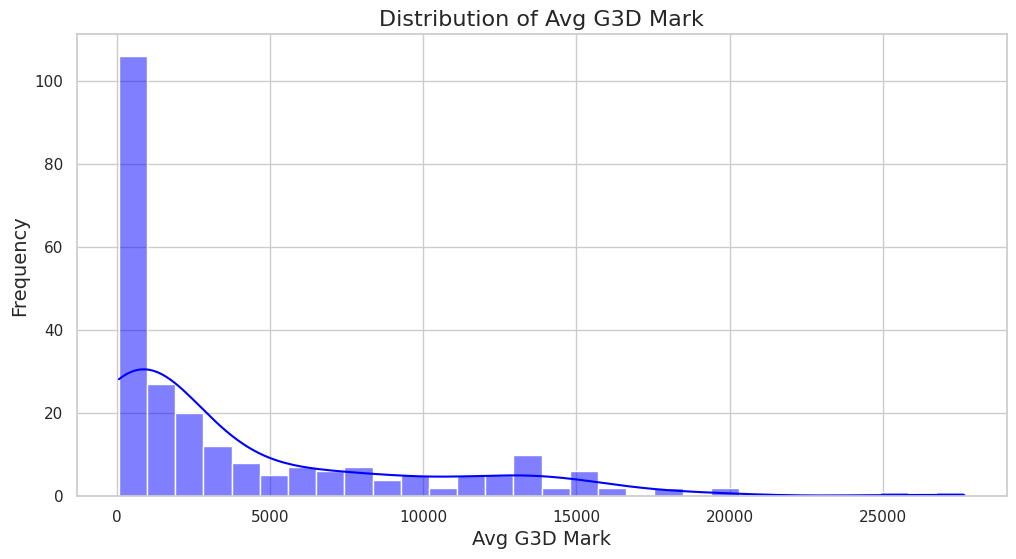

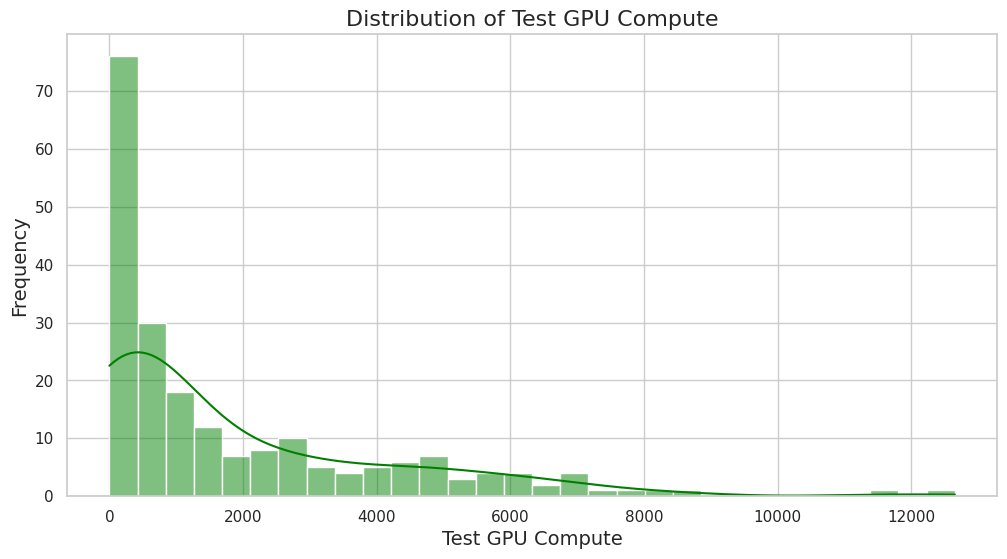

In [103]:
# Plot the distribution of avg_g3d_mark
plt.figure(figsize=(12, 6))
sns.histplot(gpu_data['avg_g3d_mark'].dropna(), kde=True, color='blue', bins=30)
plt.title("Distribution of Avg G3D Mark", fontsize=16)
plt.xlabel("Avg G3D Mark", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Plot the distribution of test_gpu_compute
plt.figure(figsize=(12, 6))
sns.histplot(gpu_data['test_gpu_compute'].dropna(), kde=True, color='green', bins=30)
plt.title("Distribution of Test GPU Compute", fontsize=16)
plt.xlabel("Test GPU Compute", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

##### Compute vs Gaming

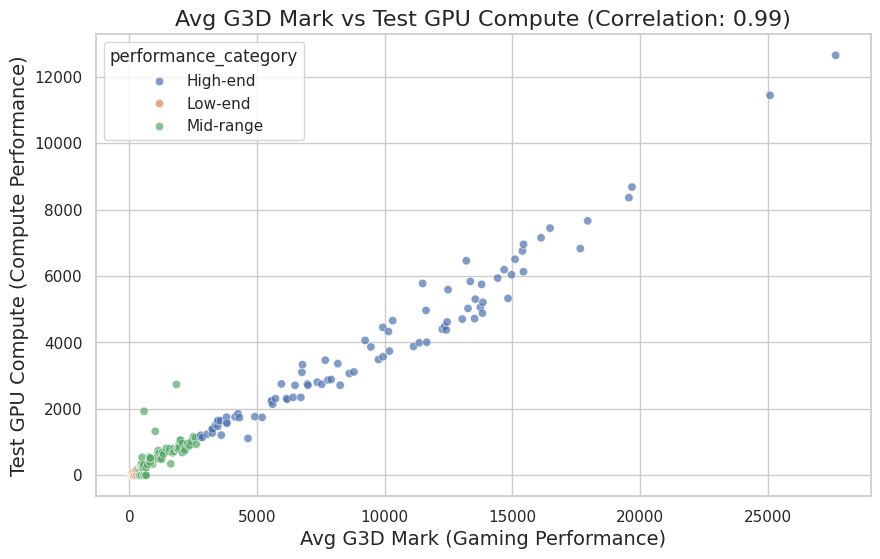

The correlation between avg_g3d_mark and test_gpu_compute is: 0.99


In [102]:
# Calculate correlation
correlation_gaming_compute = gpu_data['avg_g3d_mark'].corr(gpu_data['test_gpu_compute'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu_data, x='avg_g3d_mark', y='test_gpu_compute', hue='performance_category', alpha=0.7)

# Add titles and labels
plt.title(f"Avg G3D Mark vs Test GPU Compute (Correlation: {correlation_gaming_compute:.2f})", fontsize=16)
plt.xlabel("Avg G3D Mark (Gaming Performance)", fontsize=14)
plt.ylabel("Test GPU Compute (Compute Performance)", fontsize=14)
plt.grid(True)

# Show plot
plt.show()

# Print correlation
print(f"The correlation between avg_g3d_mark and test_gpu_compute is: {correlation_gaming_compute:.2f}")


#### Clock Speed Analysis

Features:
- `core_clock`

##### Distribution

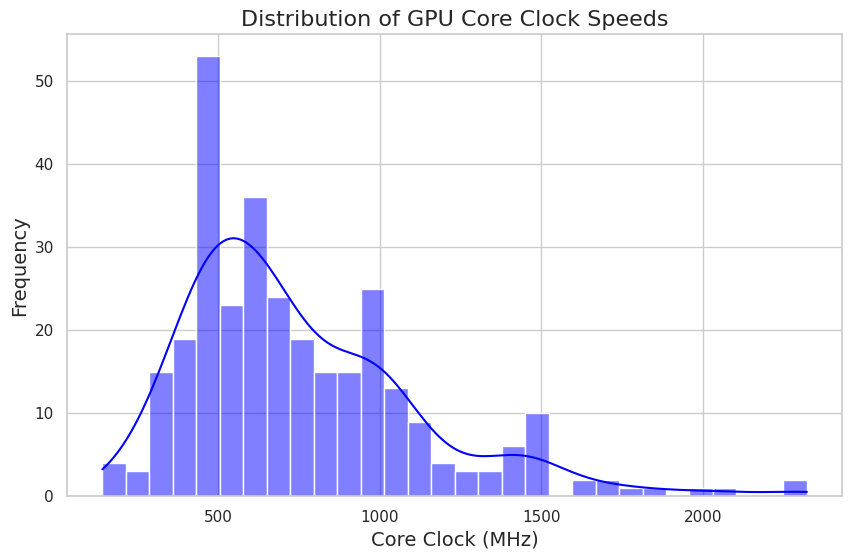

In [75]:
# Plot the distribution of core_clock
plt.figure(figsize=(10, 6))
sns.histplot(gpu_data['core_clock'].dropna(), kde=True, color='blue', bins=30)

# Add labels and title
plt.title("Distribution of GPU Core Clock Speeds", fontsize=16)
plt.xlabel("Core Clock (MHz)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

##### Impact on Performance

Correlation between core_clock and avg_g3d_mark: 0.71
Correlation between core_clock and test_directx_9: 0.70
Correlation between core_clock and test_directx_10: 0.63
Correlation between core_clock and test_directx_11: 0.68
Correlation between core_clock and test_directx_12: 0.69
Correlation between core_clock and test_gpu_compute: 0.68


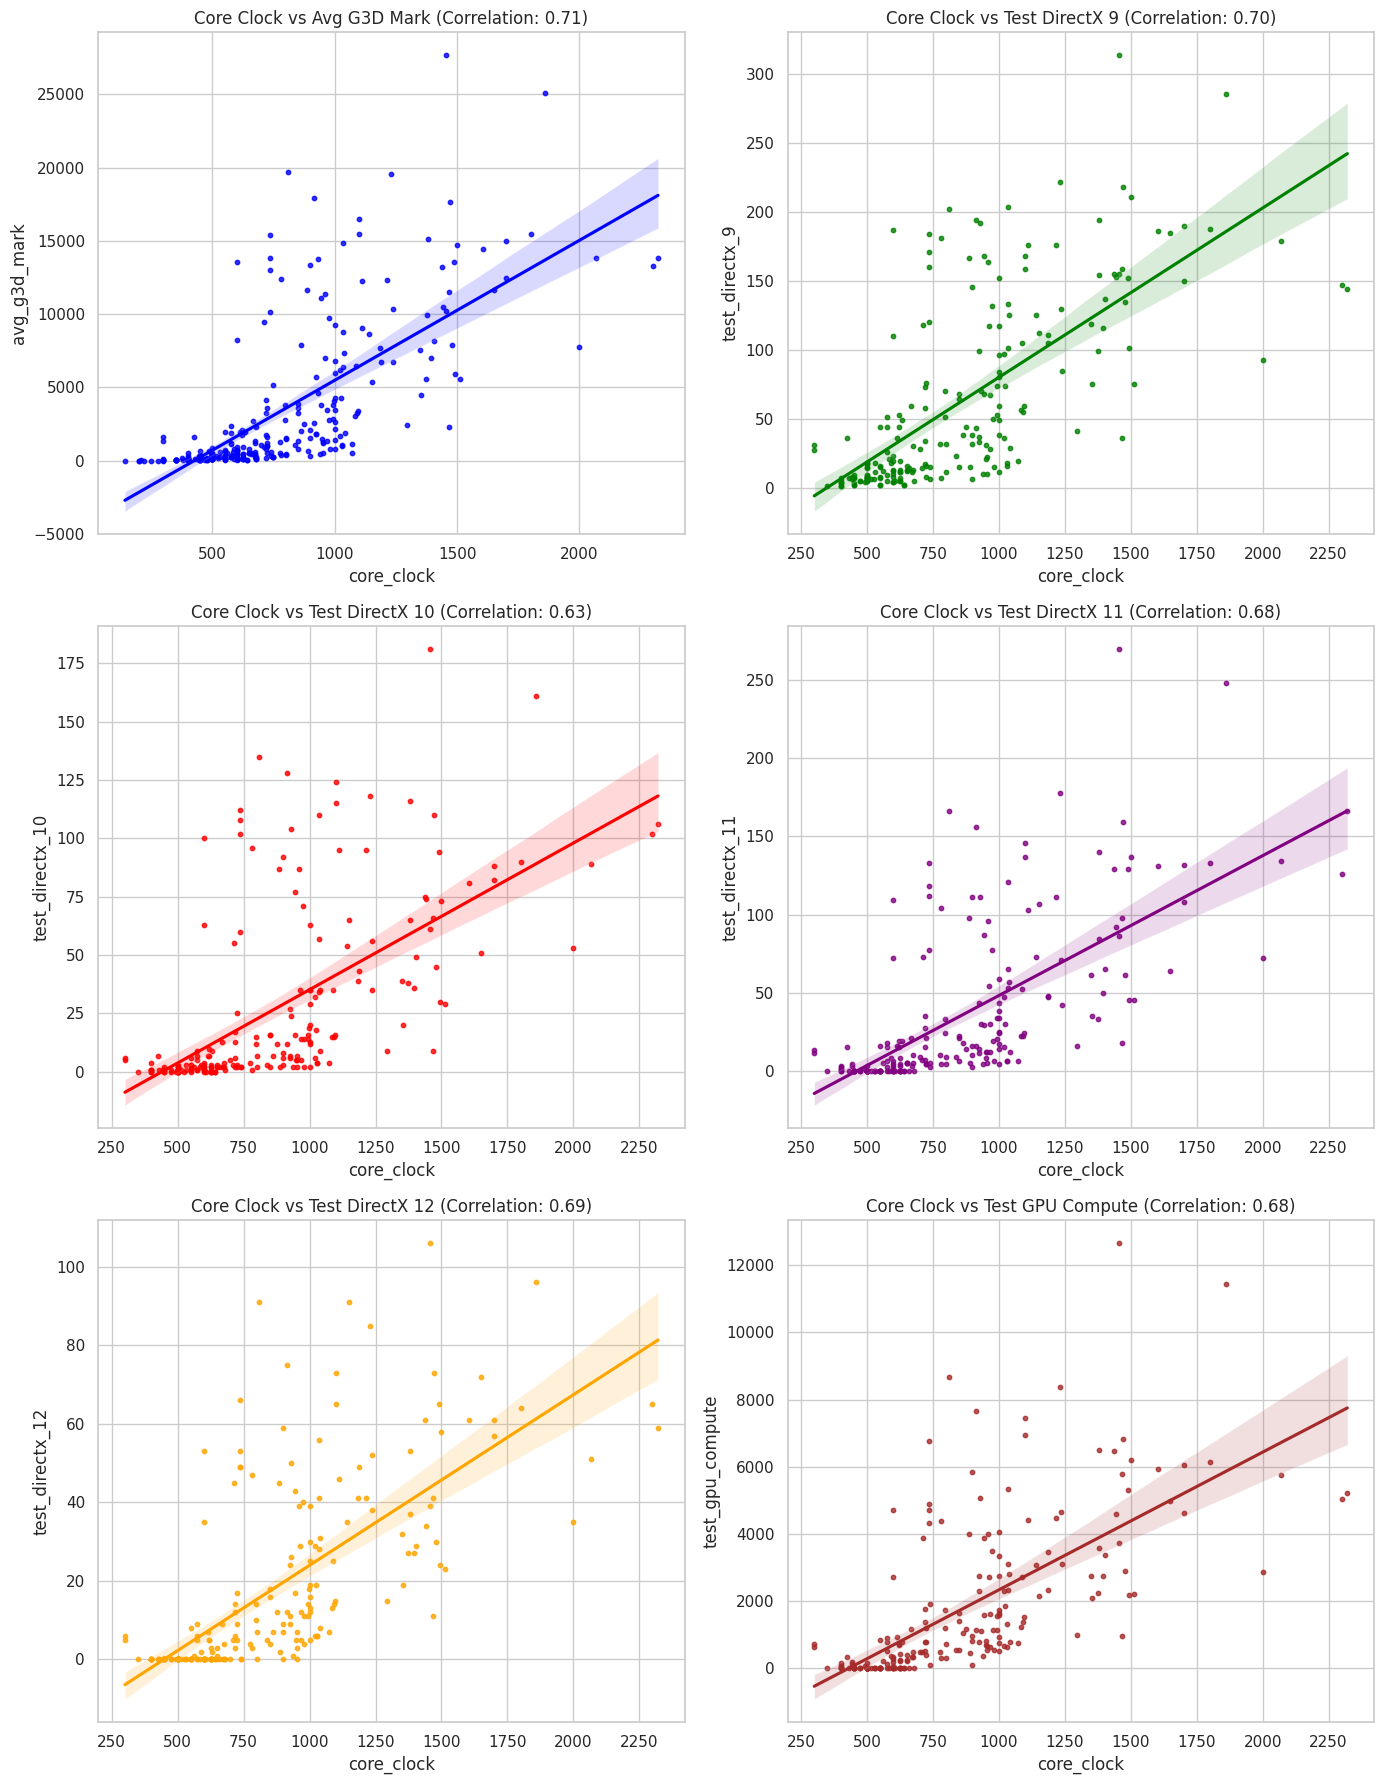

In [78]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate correlation coefficients
correlation_core_clock_avg_g3d_mark = gpu_data['core_clock'].corr(gpu_data['avg_g3d_mark'])
correlation_core_clock_test_directx_9 = gpu_data['core_clock'].corr(gpu_data['test_directx_9'])
correlation_core_clock_test_directx_10 = gpu_data['core_clock'].corr(gpu_data['test_directx_10'])
correlation_core_clock_test_directx_11 = gpu_data['core_clock'].corr(gpu_data['test_directx_11'])
correlation_core_clock_test_directx_12 = gpu_data['core_clock'].corr(gpu_data['test_directx_12'])
correlation_core_clock_test_gpu_compute = gpu_data['core_clock'].corr(gpu_data['test_gpu_compute'])

# Print correlation coefficients
print(f"Correlation between core_clock and avg_g3d_mark: {correlation_core_clock_avg_g3d_mark:.2f}")
print(f"Correlation between core_clock and test_directx_9: {correlation_core_clock_test_directx_9:.2f}")
print(f"Correlation between core_clock and test_directx_10: {correlation_core_clock_test_directx_10:.2f}")
print(f"Correlation between core_clock and test_directx_11: {correlation_core_clock_test_directx_11:.2f}")
print(f"Correlation between core_clock and test_directx_12: {correlation_core_clock_test_directx_12:.2f}")
print(f"Correlation between core_clock and test_gpu_compute: {correlation_core_clock_test_gpu_compute:.2f}")

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot core_clock vs avg_g3d_mark
sns.regplot(data=gpu_data, x='core_clock', y='avg_g3d_mark', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title(f"Core Clock vs Avg G3D Mark (Correlation: {correlation_core_clock_avg_g3d_mark:.2f})")

# Plot core_clock vs test_directx_9
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_9', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title(f"Core Clock vs Test DirectX 9 (Correlation: {correlation_core_clock_test_directx_9:.2f})")

# Plot core_clock vs test_directx_10
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_10', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title(f"Core Clock vs Test DirectX 10 (Correlation: {correlation_core_clock_test_directx_10:.2f})")

# Plot core_clock vs test_directx_11
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_11', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title(f"Core Clock vs Test DirectX 11 (Correlation: {correlation_core_clock_test_directx_11:.2f})")

# Plot core_clock vs test_directx_12
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_12', ax=axes[2, 0], color='orange', scatter_kws={'s': 10})
axes[2, 0].set_title(f"Core Clock vs Test DirectX 12 (Correlation: {correlation_core_clock_test_directx_12:.2f})")

# Plot core_clock vs test_gpu_compute
sns.regplot(data=gpu_data, x='core_clock', y='test_gpu_compute', ax=axes[2, 1], color='brown', scatter_kws={'s': 10})
axes[2, 1].set_title(f"Core Clock vs Test GPU Compute (Correlation: {correlation_core_clock_test_gpu_compute:.2f})")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### Memory and Bandwidth Analysis

Features:
- `max_memory_size`
- `bus_interface`

##### Memory Size

Unique categories in memory_size_comparison: Index(['2–4GB', '4–8GB', '8–16GB', '<2GB'], dtype='object', name='memory_size_category')
memory_size_category
<2GB        579.054545
2–4GB      3843.720588
4–8GB     11465.523810
8–16GB    16140.750000
Name: avg_g3d_mark, dtype: float64


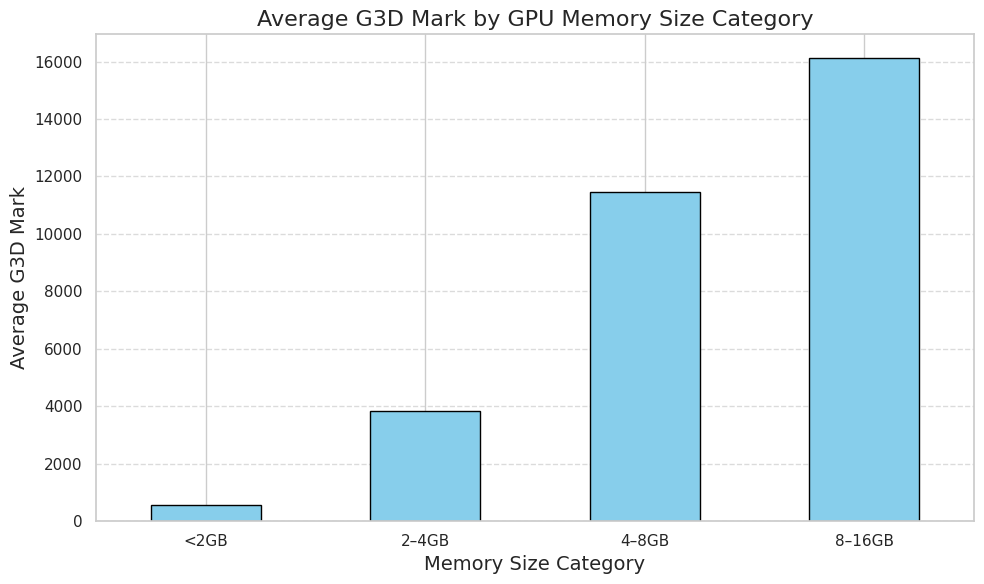

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the memory size categories with handling for NaN values
def categorize_memory_size(memory_size):
    if pd.isna(memory_size):  # Check if the value is NaN
        return 'Unknown'
    elif memory_size <= 2048:
        return '<2GB'
    elif 2048 < memory_size <= 4096:
        return '2–4GB'
    elif 4096 < memory_size <= 8192:
        return '4–8GB'
    elif 8192 < memory_size <= 16384:
        return '8–16GB'
    else:
        return '>16GB'

# Apply the categorization function to the 'max_memory_size' column
gpu_data['memory_size_category'] = gpu_data['max_memory_size'].apply(categorize_memory_size)

# Group by the memory size category and calculate the average avg_g3d_mark
memory_size_comparison = gpu_data.groupby('memory_size_category')['avg_g3d_mark'].mean()

# Exclude the 'Unknown' category from the comparison
memory_size_comparison = memory_size_comparison[memory_size_comparison.index != 'Unknown']

# Check the unique categories in the memory_size_comparison DataFrame
print("Unique categories in memory_size_comparison:", memory_size_comparison.index)

# Define the custom order of memory size categories
category_order = ['<2GB', '2–4GB', '4–8GB', '8–16GB', '>16GB']

# Ensure that the order only includes categories that are present in the data
category_order = [category for category in category_order if category in memory_size_comparison.index]

# Sort the memory_size_comparison based on the custom order
memory_size_comparison = memory_size_comparison[category_order]

# Print the results
print(memory_size_comparison)

# Plot the comparison
plt.figure(figsize=(10, 6))
memory_size_comparison.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average G3D Mark by GPU Memory Size Category", fontsize=16)
plt.xlabel("Memory Size Category", fontsize=14)
plt.ylabel("Average G3D Mark", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

##### Bus Interface

/tmp/ipykernel_2187/510242865.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bus_interface_performance.index, x=bus_interface_performance.values, palette="viridis", orient='h')


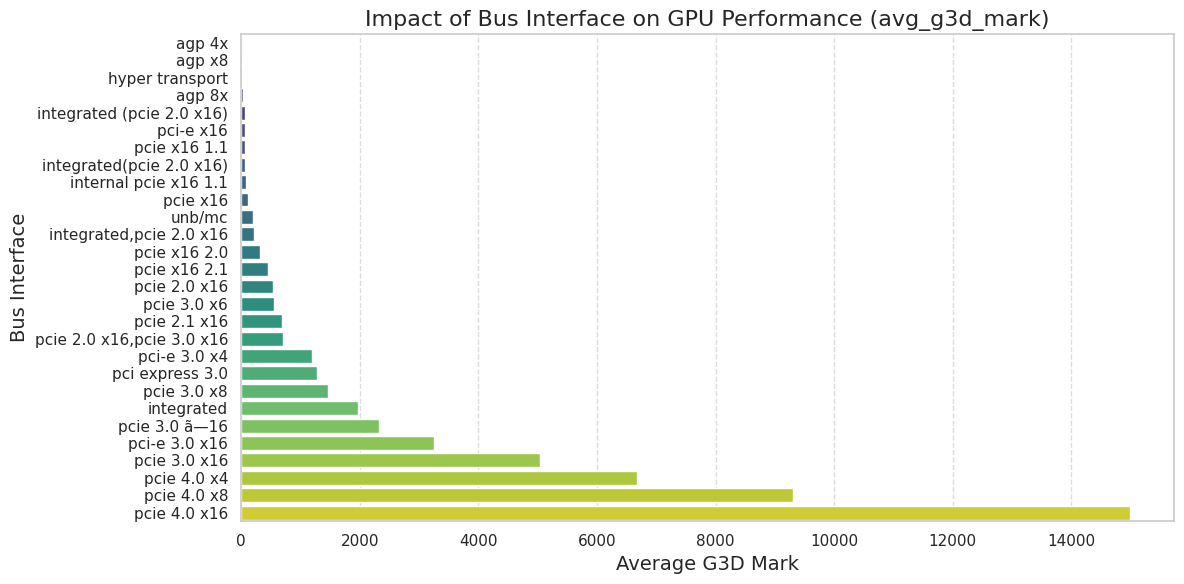

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with missing bus_interface or avg_g3d_mark
filtered_gpu_data = gpu_data.dropna(subset=['bus_interface', 'avg_g3d_mark'])

# Group by bus_interface and calculate the average avg_g3d_mark
bus_interface_performance = filtered_gpu_data.groupby('bus_interface')['avg_g3d_mark'].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=bus_interface_performance.index, x=bus_interface_performance.values, palette="viridis", orient='h')
plt.title("Impact of Bus Interface on GPU Performance (avg_g3d_mark)", fontsize=16)
plt.xlabel("Average G3D Mark", fontsize=14)
plt.ylabel("Bus Interface", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### Power Consumption (TDP)

Features:
- `max_tdp`

##### Performance vs Power

Correlation between max_tdp and avg_g3d_mark: 0.75


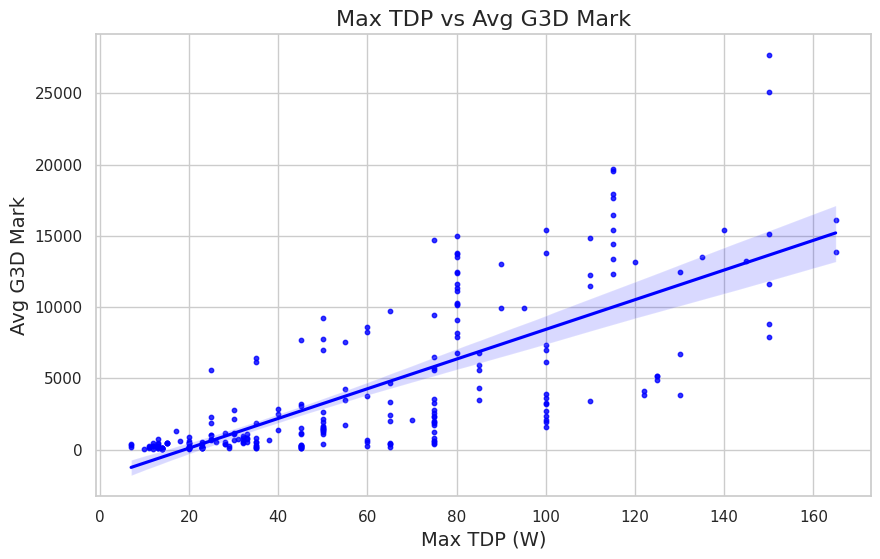

In [97]:
# Ensure 'max_tdp' column is numeric
gpu_data['max_tdp'] = pd.to_numeric(gpu_data['max_tdp'], errors='coerce')

# Calculate correlation
correlation_tdp_g3d = gpu_data['max_tdp'].corr(gpu_data['avg_g3d_mark'])

# Print the correlation result
print(f"Correlation between max_tdp and avg_g3d_mark: {correlation_tdp_g3d:.2f}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=gpu_data, x='max_tdp', y='avg_g3d_mark', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Max TDP vs Avg G3D Mark", fontsize=16)
plt.xlabel("Max TDP (W)", fontsize=14)
plt.ylabel("Avg G3D Mark", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

##### Efficiency

In [100]:
# Ensure 'avg_g3d_mark' and 'max_tdp' columns are numeric
gpu_data['avg_g3d_mark'] = pd.to_numeric(gpu_data['avg_g3d_mark'], errors='coerce')
gpu_data['max_tdp'] = pd.to_numeric(gpu_data['max_tdp'], errors='coerce')

# Exclude rows where 'max_tdp' is NaN
gpu_data = gpu_data.dropna(subset=['max_tdp'])

# Compute performance efficiency
gpu_data['efficiency'] = gpu_data['avg_g3d_mark'] / gpu_data['max_tdp']

# Sort the DataFrame by 'efficiency'
gpu_data_sorted = gpu_data.sort_values(by='efficiency', ascending=False)

# Display the top 5 rows of the sorted DataFrame
print("Top 5 GPUs by Efficiency:")
print(gpu_data_sorted[['name', 'avg_g3d_mark', 'max_tdp', 'efficiency']].head())

# Display the bottom 5 rows of the sorted DataFrame
print("\nBottom 5 GPUs by Efficiency:")
print(gpu_data_sorted[['name', 'avg_g3d_mark', 'max_tdp', 'efficiency']].tail())

Top 5 GPUs by Efficiency:
                 name  avg_g3d_mark  max_tdp  efficiency
509  radeon pro w6300          5560     25.0  222.400000
595   radeon rx 7600s         14679     75.0  195.720000
597   radeon rx 6700s         14969     80.0  187.112500
555  radeon pro 5600m          9233     50.0  184.660000
617  geforce rtx 4090         27668    150.0  184.453333

Bottom 5 GPUs by Efficiency:
                    name  avg_g3d_mark  max_tdp  efficiency
103       radeon hd 6320           147     45.0    3.266667
167  geforce go 7800 gtx           210     65.0    3.230769
84        radeon hd 6310           122     45.0    2.711111
63        radeon hd 6250            94     35.0    2.685714
70        radeon hd 6290           105     45.0    2.333333


## Laptop tables

Checking up the statistics

In [ ]:
def column_statistics(df, column_name):
    return df[column_name].describe()

stats = column_statistics(data, 'laptop_specs_price')
print(stats)


In [ ]:
def count_na_per_column(df):
    return df.isna().sum()

na_counts = count_na_per_column(data)
print(na_counts)

In [ ]:
df0 = data

Treating other things

In [ ]:
import pandas as pd
import re

def classify_laptops_dynamic(df, column_name):
    """
    Classify laptops in a DataFrame as 'prestige' or 'normal' based on their names.

    :param df: pandas DataFrame containing laptop data
    :param column_name: str, the name of the column with laptop names
    :return: pandas DataFrame with an added 'category' column for classification
    """
    # Define a list of keywords indicating a "prestige" laptop
    prestige_keywords = [
        "gaming", "pro", "advanced", "predator", "rog", "stealth", 
        "victus", "zenbook", "xps", "zephyrus", "surface", "carbon", "ultra"
    ]

    # Compile the keywords into a regex pattern
    prestige_pattern = re.compile(r'\b(' + '|'.join(prestige_keywords) + r')\b', re.IGNORECASE)

    def classify(name):
        # Normalize name to lowercase and apply checks
        name = name.lower()

        # 1. Check if the name contains any prestige keywords
        if prestige_pattern.search(name):
            return "1"
        
        # 2. Check if the name has more than 5 words (brand + series + 2+ descriptive terms)
        words = name.split()
        if len(words) > 5:
            return "1"

        # Default: "normal"
        return "0"
    
    # Apply the classification function to the specified column
    df["category"] = df[column_name].apply(classify)
    return df

# Example usage:
# Assuming `laptops.csv` contains the data with a column "LaptopName"
df1 = classify_laptops_dynamic(df0, "cpu_specs_laptop_specs_laptop_specs_name")

# Print the updated DataFrame
print(df1)




In [ ]:
df2 = df1.drop(columns=["laptop_specs_id", "laptop_specs_source", "laptop_specs_cpu", "laptop_specs_vga", \
                "cpu_specs_laptop_specs_laptop_specs_name", "cpu_specs_performance_clockspeed", "cpu_specs_performance_turbospeed", \
                "cpu_specs_performance_cores", "cpu_specs_performance_threads", "cpu_specs_efficient_clockspeed", \
                "cpu_specs_efficient_turbospeed", "cpu_specs_efficient_cores", "cpu_specs_efficient_threads", "cpu_specs_tdp", \
                "cpu_specs_l1_instruction_cache", "cpu_specs_l1_data_cache", "cpu_specs_l2_cache", "cpu_specs_l3_cache", \
                "cpu_specs_eff_l1_instruction_cache", "cpu_specs_eff_l1_data_cache", "cpu_specs_eff_l2_cache", \
                "gpu_specs_bus_interface", "gpu_specs_max_memory_size", 'gpu_specs_core_clock', 'gpu_specs_max_direct', \
                'gpu_specs_open_gl', 'gpu_specs_max_tdp', 'cpu_specs_laptop_specs_laptop_specs_name'])

df2

In [ ]:
df3 = df2
def categorize(listed):
    for i in listed:
        df3[i] = pd.Categorical(df3[i]).codes
categorize(["laptop_specs_brand", "laptop_specs_ram_type", 'laptop_specs_storage_type', \
            'laptop_specs_webcam_resolution', 'laptop_specs_default_os'])

df3

In [ ]:
df4 = df3

def fill_list(name, filler):
    # List of elements to randomly choose from
    fill_values = filler

    # Fill NaN values with random elements from the list
    df4[name] = df4[name].apply(
        lambda x: x if pd.notna(x) else np.random.choice(fill_values)
    )

def fill_rand(name, start, end):
    min_value = start
    max_value = end

    # Fill NaN values with random numbers within the range
    df4[name] = df4[name].apply(
        lambda x: x if pd.notna(x) else np.random.randint(min_value, max_value + 1) + np.random.randint(0, 100)/100
    )

fill_list("laptop_specs_ram_amount", [8, 16, 32])
fill_list("laptop_specs_storage_amount", [256, 512, 1024])
fill_list("laptop_specs_screen_refresh_rate", [60, 90, 120, 144, 180])
fill_list("laptop_specs_screen_brightness", [250, 300, 350, 400, 500])
fill_list("laptop_specs_battery_capacity", [35, 40, 45, 48, 50, 55, 60])
fill_list("laptop_specs_battery_cells", [3, 4])
fill_list("laptop_specs_weight", [1.5, 1.8])
fill_list("laptop_specs_warranty", [12, 24])
fill_list("laptop_specs_number_usb_a_ports", [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3])
fill_list("laptop_specs_number_usb_c_ports", [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3])
fill_list("laptop_specs_number_hdmi_ports", [0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
fill_list("laptop_specs_number_ethernet_ports", [0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
fill_list("laptop_specs_number_audio_jacks", [0, 1])
fill_list("gpu_specs_avg_g3d_mark", [0])
fill_list("gpu_specs_test_directx_9", [0])
fill_list("gpu_specs_test_directx_10", [0])
fill_list("gpu_specs_test_directx_11", [0])
fill_list("gpu_specs_test_directx_12", [0])
fill_list("gpu_specs_test_gpu_compute", [0])
fill_list("laptop_specs_screen_resolution", ["1920x1080"])

fill_rand("laptop_specs_width", 31, 39) 
fill_rand("laptop_specs_depth", 21, 27)
fill_rand("laptop_specs_height", 21, 27)
fill_rand("laptop_specs_screen_size", 12, 16)

df4


In [ ]:
df5 = df4
# Split the 'Dimensions' column into M and N
df5[['M', 'N']] = df5['laptop_specs_screen_resolution'].str.split('x', expand=True).astype(int)

# Calculate M * N and M / N
df5['screen_area'] = df5['M'] * df5['N']
df5['screen_ratio'] = df5['M'] / df5['N']

df5 = df5.drop(columns=["M", 'N', 'laptop_specs_screen_resolution', 'cpu_specs_laptop_specs_laptop_specs_name.2', \
                        'cpu_specs_laptop_specs_laptop_specs_name.1'])

In [ ]:
na_counts = count_na_per_column(df5)
na_counts

In [ ]:
output_path = 'laptop_specs_processed.csv'  # Specify your file name or path
df5.to_csv(output_path, index=False) 

proc = df5

Doing some EDAs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_top(df, cat_name, top_cnt = 5):
    top = df[cat_name].value_counts().head(top_cnt)

    plt.figure(figsize=(8, 6))
    top.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 5 Most Popular Elements in Column '{cat_name}'", fontsize=16)
    plt.xlabel("Element", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

get_top(data, "laptop_specs_brand", 5)

In [ ]:
from matplotlib.ticker import ScalarFormatter

def plot_hist(df, name):
    # Set the plot style
    sns.set_theme(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[name], kde=True, color="blue", bins=30)

    # Add labels and title
    plt.title("Price Distribution", fontsize=16)
    plt.xlabel("Price", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    # Disable scientific notation on the x-axis
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style="plain", axis="x")

    # Show the plot
    plt.show()

plot_hist(data, "laptop_specs_price")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_duo_correlation(data, first_col, second_col):
    import numpy as np

    # Calculate correlation
    correlation = data[first_col].corr(data[second_col])
    
    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=first_col, y=second_col, color="blue", alpha=0.7)

    # Add titles and labels
    plt.title("{} vs {} (Correlation: {:.2f})".format(first_col, second_col, correlation), fontsize=16)
    plt.xlabel("{}".format(first_col), fontsize=14)
    plt.ylabel("{}".format(second_col), fontsize=14)
    plt.grid(True)

    # Adjust x-axis formatter
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style="plain", axis="x")
    
    # Show plot
    plt.show()
    
    # Print correlation
    print(f"The correlation between {first_col} and {second_col} is: {correlation:.2f}")

plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_ram_amount')



In [ ]:
plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_storage_amount')

In [ ]:
plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_screen_size')

In [ ]:
plot_duo_correlation(df5, 'laptop_specs_price', 'cpu_specs_multithread_rating')

In [ ]:
plot_duo_correlation(df5, 'laptop_specs_price', 'cpu_specs_single_thread_rating')

In [ ]:
def calculate_price_correlation(df, price_column):
    # Ensure the column exists
    if price_column not in df.columns:
        raise ValueError(f"Column '{price_column}' not found in the DataFrame.")
    
    # Compute correlations
    correlations = df.corr()[price_column].drop(price_column)
    
    # Print each correlation
    print(f"Correlations with '{price_column}':\n")
    print(correlations.sort_values(ascending=False))
    
    return correlations

# Example usage
price_correlations = calculate_price_correlation(df5, 'laptop_specs_price')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

brand_counts = data["laptop_specs_brand"].value_counts()
valid_brands = brand_counts[brand_counts >= 10].index
filtered_df = data[data["laptop_specs_brand"].isin(valid_brands)]

# Group data by brand for average price and GPU power
avg_price = filtered_df.groupby("laptop_specs_brand")["laptop_specs_price"].mean().sort_values(ascending=False)
avg_cpu = filtered_df.groupby("laptop_specs_brand")["cpu_specs_multithread_rating"].mean().sort_values(ascending=False)
avg_gpu = filtered_df.groupby("laptop_specs_brand")["gpu_specs_test_gpu_compute"].mean().sort_values(ascending=False)

# Plot Average Price and GPU Power
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
sns.barplot(x=avg_price.index, y=avg_price.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Average Price by Brand", fontsize=14)
axes[0].set_ylabel("Average Price")
axes[0].set_xlabel("Brand")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(x=avg_cpu.index, y=avg_cpu.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Average CPU Power by Brand", fontsize=14)
axes[1].set_ylabel("CPU Power")
axes[1].set_xlabel("Brand")
axes[1].tick_params(axis="x", rotation=45)

sns.barplot(x=avg_gpu.index, y=avg_gpu.values, ax=axes[2], palette="Reds_d")
axes[2].set_title("Average GPU Power by Brand", fontsize=14)
axes[2].set_ylabel("GPU Power")
axes[2].set_xlabel("Brand")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
